# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

## Computing Historical Volatility

In this notebook, we will be computing the 20 trading days (or 1 month) historical volatility for the time period starting from 20th April, 2016 to 13th April, 2018. Historical Volatility gauges the fluctuations of underlying securities by measuring the price changes over a predetermined period of time in the past.

## Import the libraries
First, we will import the necessary libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

## Stock data 
We will fetch the Apple data using the pandas `read_csv` function. We will then, print the data to visualize it by using the `head()` function which prints the top 5 rows of the dataset.

This data is available in the downloadable unit of this course in the last section. You can also download Apple stock data  from finance.yahoo.com.

In [2]:
data = pd.read_csv('../data_modules/apple_stock_data.csv',parse_dates = ['Date'],  index_col = 'Date')
data.head()

,Adj_Close
Date,
2016-04-20,102.872663
2016-04-21,101.758761
2016-04-22,101.480285
2016-04-25,100.904129
2016-04-26,100.203140


## Computing Log Returns

Now we will compute the daily log returns by using the `shift()` function for adjusted closing prices of the security. We make use of the numpy library for computing log of today's closing price divided by yesterday's closing price. The log returns are stored in the DataFrame data under the column header 'Log Returns'.

In [3]:
data['Log Returns'] = np.log(data['Adj_Close']/data['Adj_Close'].shift(1))

## Computing Historical Volatility

The one month (or 20 trading days) historical volatility will be computed by using the `DataFrame.rolling(window).std()` function which computes the rolling standard deviation of data['Log Returns'] for a period of 20 trading days. The standard deviation is multiplied by 100 to compute the percentage value for volatility. The historical volatility will be stored in the DataFrame under the column header '20 day Historical Volatility'. 
To read more about historical volatility please refer to this blog article: [Computing historical volatility](https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/)

In [4]:
data['20 day Historical Volatility'] = 100*data['Log Returns'].rolling(window=20).std()*np.sqrt(20)

## Plot the volatility
We will now plot the historical volatility to visualise how it changes over the period.

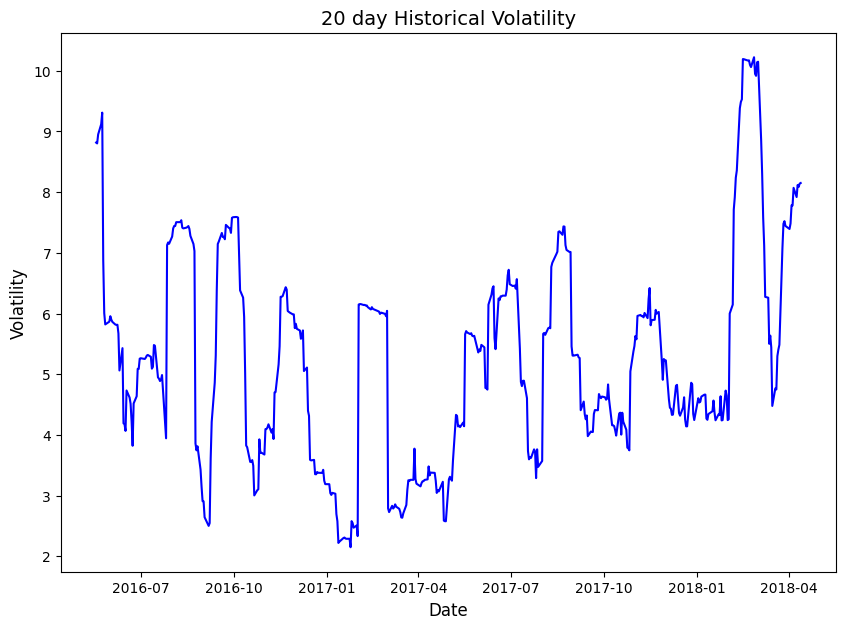

In [5]:
plt.figure(figsize=(10,7))
plt.plot(data['20 day Historical Volatility'], color = 'b')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Volatility',fontsize = 12)
plt.title('20 day Historical Volatility',fontsize = 14)
plt.show()